In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
import numpy as np
from datetime import date
import datetime as dt
from plotnine import *
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#1 Import the data from Nenana1.csv, and have all data in one column.
df = pd.read_csv("https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/Nenana1.csv", sep='.')
# Convert to datetime variable
df['DateTime'] = pd.to_datetime(df['Year,Date & Time'].apply(lambda x:dt.datetime.strptime(x.replace('at ', ''),'%Y,%B %d %I:%M %p')))
# Store year in a separte column
df['Year'] = pd.to_datetime(df['DateTime']).dt.year
# Create a column for each row: Year+January 1 00:00
df['January1'] = df['Year'].apply(lambda x:pd.to_datetime(dt.date(x,1,1)))
df.head()

,"Year,Date & Time",DateTime,Year,January1
0,"1917,April 30 at 11:30 AM",1917-04-30 11:30:00,1917,1917-01-01
1,"1918,May 11 at 9:33 AM",1918-05-11 09:33:00,1918,1918-01-01
2,"1919,May 3 at 2:33 PM",1919-05-03 14:33:00,1919,1919-01-01
3,"1920,May 11 at 10:46 AM",1920-05-11 10:46:00,1920,1920-01-01
4,"1921,May 11 at 6:42 AM",1921-05-11 06:42:00,1921,1921-01-01


In [ ]:
#2 Implement KPI:difference between each date and 1/1 of that year
# seconds--> convert to days devided by the number of seconds in one day = 60*60*24
df['KPI'] = pd.to_timedelta(df['DateTime']-df['January1']).dt.total_seconds()/(60*60*24)
df.head()

,"Year,Date & Time",DateTime,Year,January1,KPI
0,"1917,April 30 at 11:30 AM",1917-04-30 11:30:00,1917,1917-01-01,119.479167
1,"1918,May 11 at 9:33 AM",1918-05-11 09:33:00,1918,1918-01-01,130.397917
2,"1919,May 3 at 2:33 PM",1919-05-03 14:33:00,1919,1919-01-01,122.606250
3,"1920,May 11 at 10:46 AM",1920-05-11 10:46:00,1920,1920-01-01,131.448611
4,"1921,May 11 at 6:42 AM",1921-05-11 06:42:00,1921,1921-01-01,130.279167


In [ ]:
# Calculate the mean of KPI before and after 1960
df['M0'] = df.loc[0:42,'KPI'].mean()
df.loc[43:,'M0'] = df.loc[43:,'KPI'].mean()

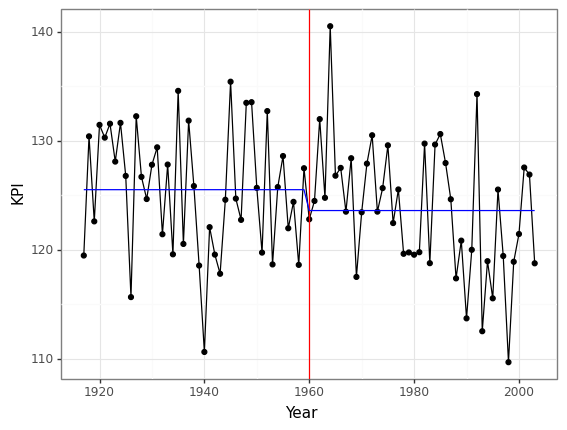

<ggplot: (8747506542585)>

In [ ]:
#3 Create a graph of your KPI and describe the pattern(s) you see in data. (included mean of KPI)
(
    ggplot(df, aes('Year', 'KPI')) + geom_point() + geom_line() + theme_bw() +
 geom_vline(xintercept=1960, color='red') +geom_line(aes('Year', 'M0'), color='blue', size=0.5)
)

Pattern of the graph: After Year 1960, there is a downtrend in KPI (the amount of time of ice-breaking each year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.294
Date:                Thu, 15 Sep 2022   Prob (F-statistic):              0.134
Time:                        23:38:35   Log-Likelihood:                -276.67
No. Observations:                  87   AIC:                             557.3
Df Residuals:                      85   BIC:                             562.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.5111      0.898    139.790      0.0

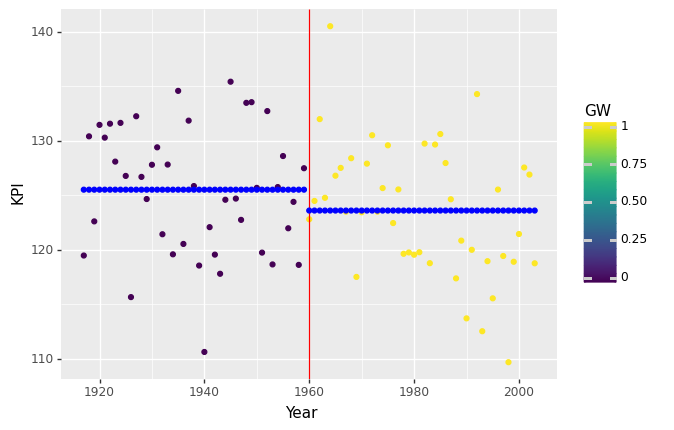

<ggplot: (8747503478677)>

In [ ]:
#4 Conduct AB Test for KPI (Before 1960 and after 1960) Abrupt change in KPI
ss.ttest_ind(a=df.loc[:43, 'KPI'].values.astype("float64"), b=df.loc[44:, 'KPI'].values.astype("float64"), equal_var=False, alternative = "greater")


df['GW'] = 0
df['GW'][43:] = 1
M_abrupt = smf.ols('KPI~GW',data=df).fit()
print(M_abrupt.summary())
M_abrupt.fittedvalues
df['M_abrupt'] = M_abrupt.fittedvalues
(
    ggplot(df, aes('Year','KPI',color='GW')) + geom_point() + geom_vline(xintercept=1960, color='red') + 
 geom_point(aes('Year','M_abrupt'),color='blue') 
)

A4: Since the p-value (0.067) > alpha (0.05), we conclude that the data doest not provide statistically significant evidence of global warming.

In [ ]:
# Create a ramp variable to model gradual change in KPI after the BM program was introduced
# Ramp = 0,0,0,0,0,0.....1,2,3,4,5,6.....44
df['Ramp'] = 0
list(range(45))[1:]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44]

In [ ]:
df.loc[43:,'Ramp'] = list(range(45))[1:]

In [ ]:
#5 Build a regression model to assess the signficance of the graduel effect of the BM intervention
# Model KPI = b0 + b1*Ramp
M1 = smf.ols('KPI ~ Ramp', data = df).fit()
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.069
Date:                Thu, 15 Sep 2022   Prob (F-statistic):            0.00342
Time:                        23:38:36   Log-Likelihood:                -273.42
No. Observations:                  87   AIC:                             550.8
Df Residuals:                      85   BIC:                             555.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.9884      0.774    162.675      0.0

In [ ]:
M1.pvalues[1]/2

0.001711669761674431

In [ ]:
(
    ggplot(df, aes('Year','KPI',color='Ramp')) + geom_point() + geom_vline(xintercept=1960, color='red') + 
 geom_point(aes('Year','M1'),color='blue') 
)

TypeError: ignored

A5: Since the p-value(0.002) is less than alpha (0.05), the data provides statistically significant evidence of global warming and the effect is gradual.

Q6:Which one – abrupt or gradual effect of the intervention in 1960 is more appropriate? Briefly justify your answer.

I think gradual effect of the intervention in 1960 is more appropriate because in 1960, Charles Keeling accurately measured atmospheric concentrations and showed that they were definitely increasing, ushered in a new age of expanding climate research, and the atmospheric concentration kept accumulating since the oceans would not absorb all industrial CO2 emissions. Therefore, the effect of excessive CO2 emissions and accumulation should be considered as incremental, and the gradual effect of the intervention of 1960 is more appropriate.

In [ ]:
#7 Practical meaning of the evidence of global warming
(df.loc[43:,'KPI'].mean() - df.loc[:42,'KPI'].mean()) / df.loc[:42,'KPI'].mean() *100

-1.5235680856001192

On average KPI (the amount of time in days between the moment ice breaks in Nenana and January 1 each year) decresed by 1.5% after year 1960. It indicates while the global temperature keeps increasing, it takes less time for the ice to break.

Q8: Compare your approach with the approach we used to assess the effectiveness of the batmobile program. Have you observed any differences? Briefly comment.

In [2]:
# Import the data from Nenana2.csv, and have all data in one column.
df2 = pd.read_csv("https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/Nenana2.csv", sep='.')
df2['DateTime'] = pd.to_datetime(df2['Year,Date & Time'].apply(lambda x:dt.datetime.strptime(x.replace('at ', ''),'%Y,%B %d %I:%M %p')))
df2['Year'] = pd.to_datetime(df2['DateTime']).dt.year
df2['January1'] = df2['Year'].apply(lambda x:pd.to_datetime(dt.date(x,1,1)))
df2['KPI'] = pd.to_timedelta(df2['DateTime']-df2['January1']).dt.total_seconds()/(60*60*24)

In [3]:
# Calculate the mean of KPI before and after 1960
df2['M0'] = df2.loc[0:42,'KPI'].mean()
df2.loc[43:,'M0'] = df2.loc[43:,'KPI'].mean()

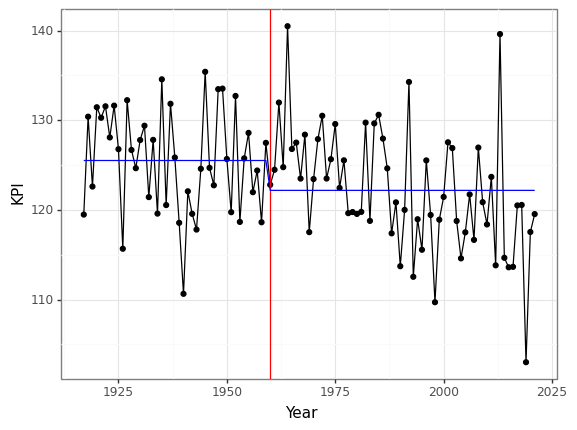

<ggplot: (8784733071373)>

In [4]:
# Create a graph of your KPI and describe the pattern(s) you see in data. (included mean of KPI)
(
    ggplot(df2, aes('Year', 'KPI')) + geom_point() + geom_line() + theme_bw() +
 geom_vline(xintercept=1960, color='red') +geom_line(aes('Year', 'M0'), color='blue', size=0.5)
)

In [6]:
#4 Conduct AB Test for KPI (Before 1960 and after 1960)Abrupt change in KPI
ss.ttest_ind(a=df2.loc[:43, 'KPI'].values.astype("float64"), b=df2.loc[44:, 'KPI'].values.astype("float64"), equal_var=False, alternative = "greater")

df2['GW'] = 0
df2['GW'][43:] = 1
M_abrupt = smf.ols('KPI~GW',data=df2).fit()
print(M_abrupt.summary())

M_abrupt.fittedvalues
df2['M_abrupt'] = M_abrupt.fittedvalues
(
    ggplot(df2, aes('Year','KPI',color='GW')) + geom_point() + geom_vline(xintercept=1960, color='red') + 
 geom_point(aes('Year','M_abrupt'),color='blue') 
)
M_abrupt.pvalues[1]/2

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.966
Date:                Fri, 16 Sep 2022   Prob (F-statistic):            0.00960
Time:                        04:37:54   Log-Likelihood:                -342.21
No. Observations:                 105   AIC:                             688.4
Df Residuals:                     103   BIC:                             693.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.5111      0.970    129.437      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.004798521984898646

A4: Since the p-value (0.005) < alpha (0.05), we conclude that the data provides statistically significant evidence of global warming.

In [12]:
# Create a ramp variable to model gradual change in KPI after the BM program was introduced
# Ramp = 0,0,0,0,0,0.....1,2,3,4,5,6.....62
df2['Ramp'] = 0

In [8]:
df2.loc[43:,'Ramp'] = list(range(63))[1:]

In [9]:
# Build a regression model to assess the signficance of the graduel effect of the BM intervention
# Model KPI = b0 + b1*Ramp
M1 = smf.ols('KPI ~ Ramp', data = df2).fit()
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     23.37
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           4.69e-06
Time:                        04:41:55   Log-Likelihood:                -334.91
No. Observations:                 105   AIC:                             673.8
Df Residuals:                     103   BIC:                             679.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.0571      0.778    162.027      0.0

In [10]:
M1.pvalues[1]/2

2.346865932908275e-06

A5: Since the p-value(0.00) is less than alpha (0.05), the data provides statistically significant evidence of global warming and the effect is gradual.

In [11]:
# Practical meaning of the evidence of global warming
(df2.loc[43:,'KPI'].mean() - df2.loc[:42,'KPI'].mean()) / df2.loc[:28,'KPI'].mean() *100

-2.6542518486036344

On average KPI (the amount of time in days between the moment ice breaks in Nenana and January 1 each year) decresed by 2.7% after year 1960. It indicates while the global temperature keeps increasing, it takes less time for the ice to break.

10 What is different from the previous dataset: 
For Nenana2.txt, the data provide statistically significant evidence of global warming with both abrupt and gradual change in KPI. Whereas for Nenana.txt, there is only statsitically signifcant evidence of global warming with gradual change in KPI.